In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import scrublet 
from matplotlib.pyplot import rc_context
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
%config InlineBackend.figure_format = 'retina'
sc.settings.set_figure_params(dpi=50, dpi_save=300, figsize=(5, 5))

In [2]:
os.chdir('/disk212/yupf/database/scRNA-seq/NewAtlas') #修改路径
concat_file='./atlas_concat.h5ad'
QC_file='./atlas_qc.h5ad'
reduction_file = './atlas_rd.h5ad'
harmony_file='./atlas_harm.h5ad'
scVI_file='./atlas_scvi.h5ad'
annotation_file ='./atlas_annotation.h5ad'

In [3]:
adata=sc.read_h5ad(reduction_file)

In [4]:
sc.external.pp.harmony_integrate(adata, 'project', basis='X_pca', adjusted_basis='X_harmony')

2023-09-08 13:46:47,280 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ef8a1458310>
Traceback (most recent call last):
  File "/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' 

2023-09-08 14:31:42.772069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 14:31:42.885539: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-08 14:31:42.888816: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-08 14:31:42.888831: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

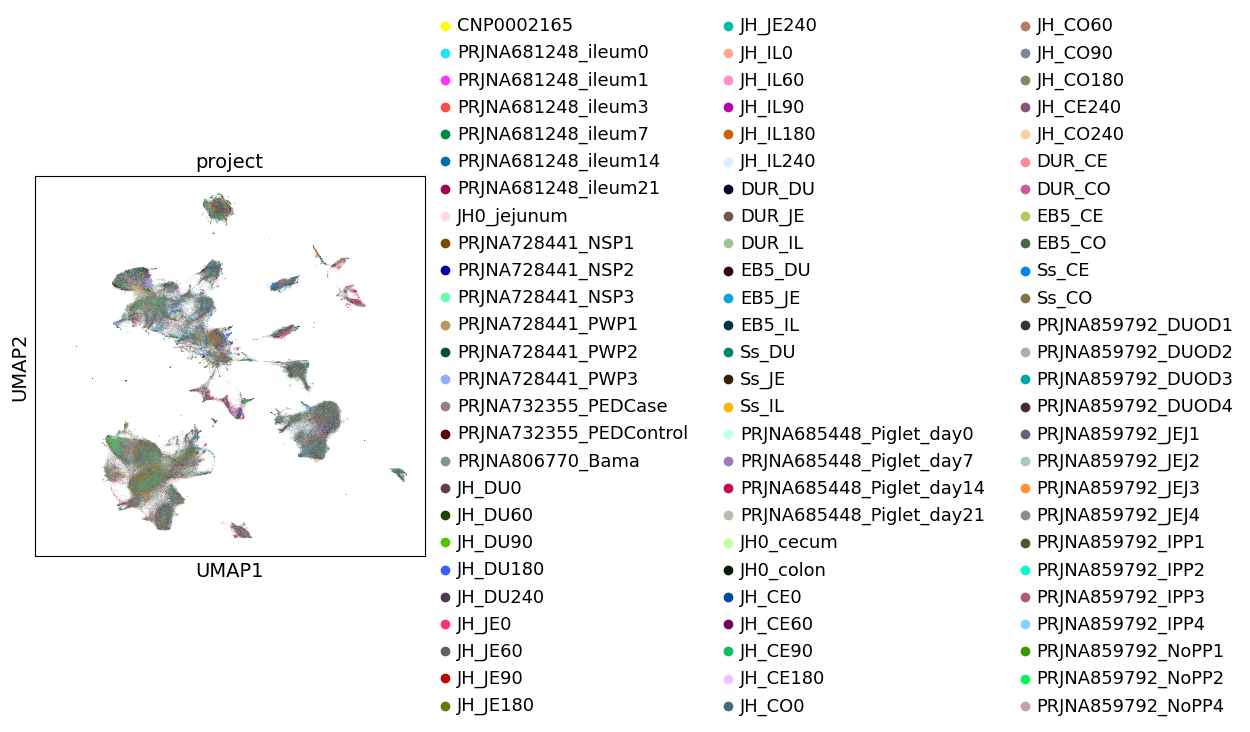

In [5]:
sc.pp.neighbors(adata, use_rep="X_harmony")
sc.tl.umap(adata, min_dist=0.1)
sc.pl.umap(adata,color='project')

### Lineage

Epithelial lineage

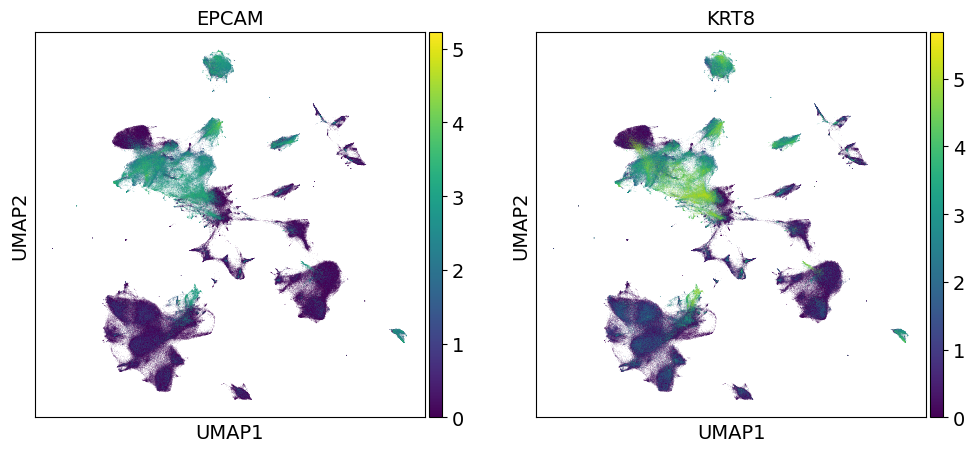

In [8]:
sc.pl.umap(adata,color=['EPCAM', 'KRT8'])

T/ILC lineage

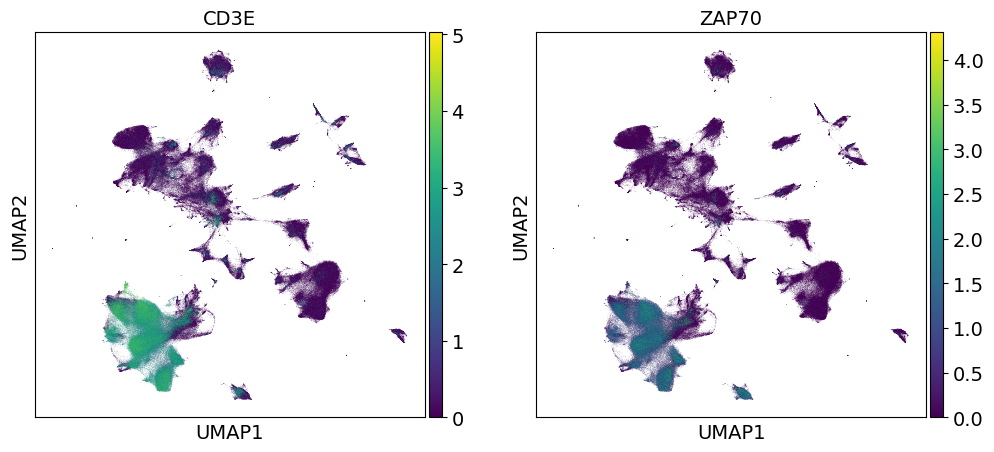

In [9]:
sc.pl.umap(adata,color=['CD3E', 'ZAP70'])

Myeloid lineage

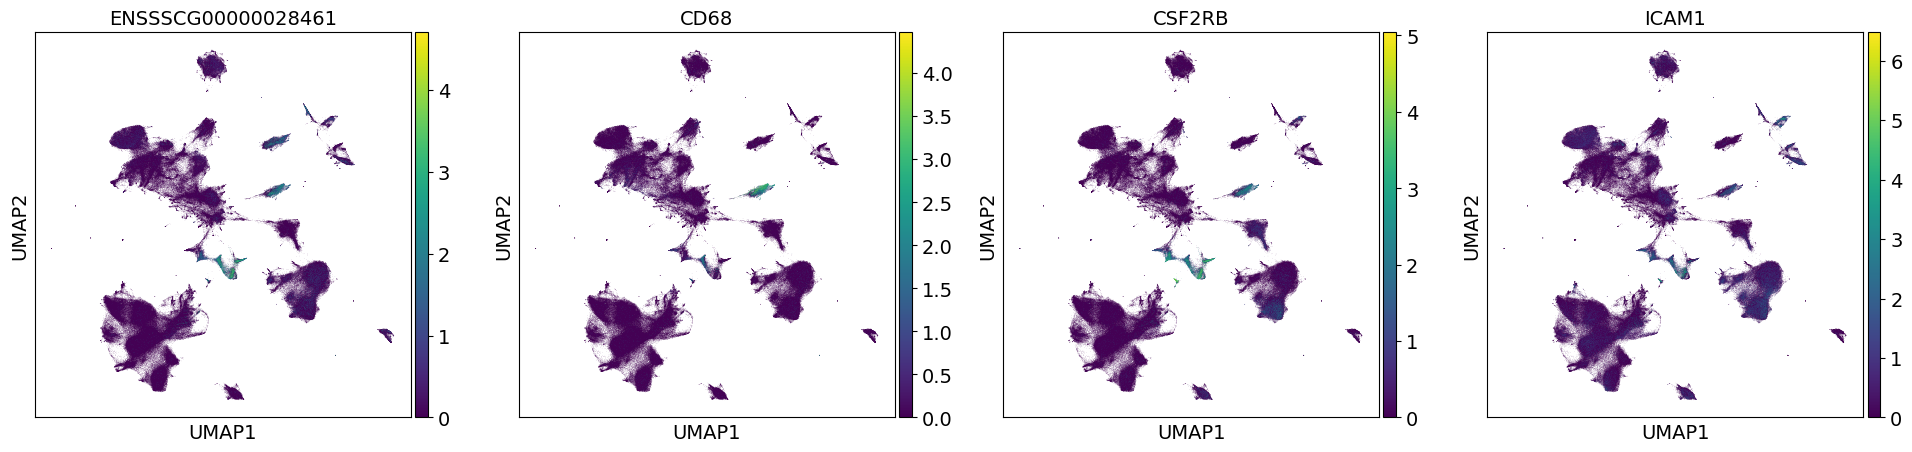

In [10]:
sc.pl.umap(adata,color=['ENSSSCG00000028461', 'CD68', 'CSF2RB', 'ICAM1'])

B lineage

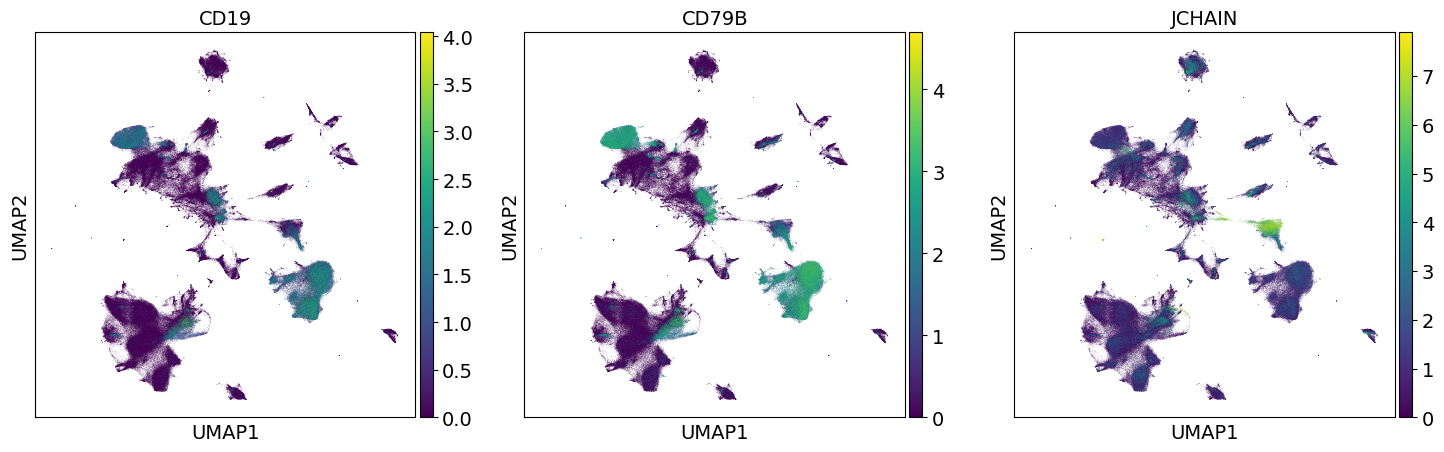

In [11]:
sc.pl.umap(adata,color=['CD19', 'CD79B', 'JCHAIN'])

Endothelial lineage

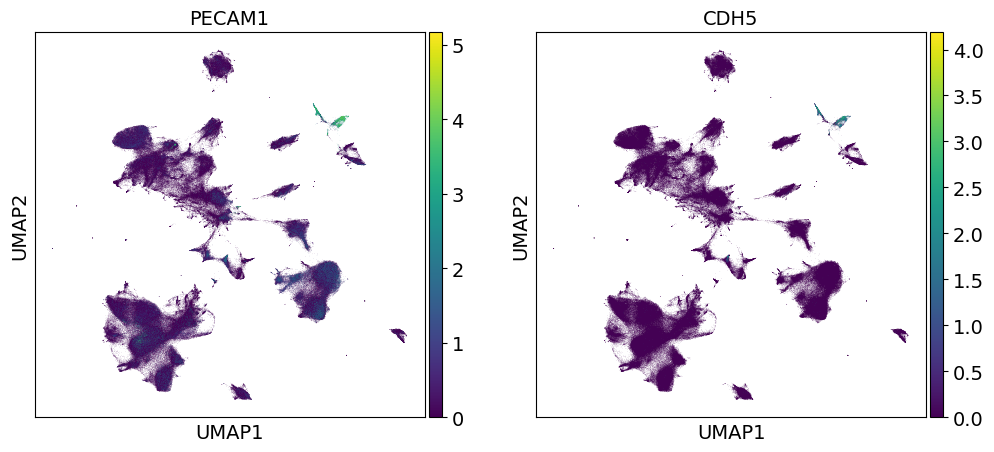

In [12]:
sc.pl.umap(adata,color=['PECAM1','CDH5'])

Mesenchymal lineage

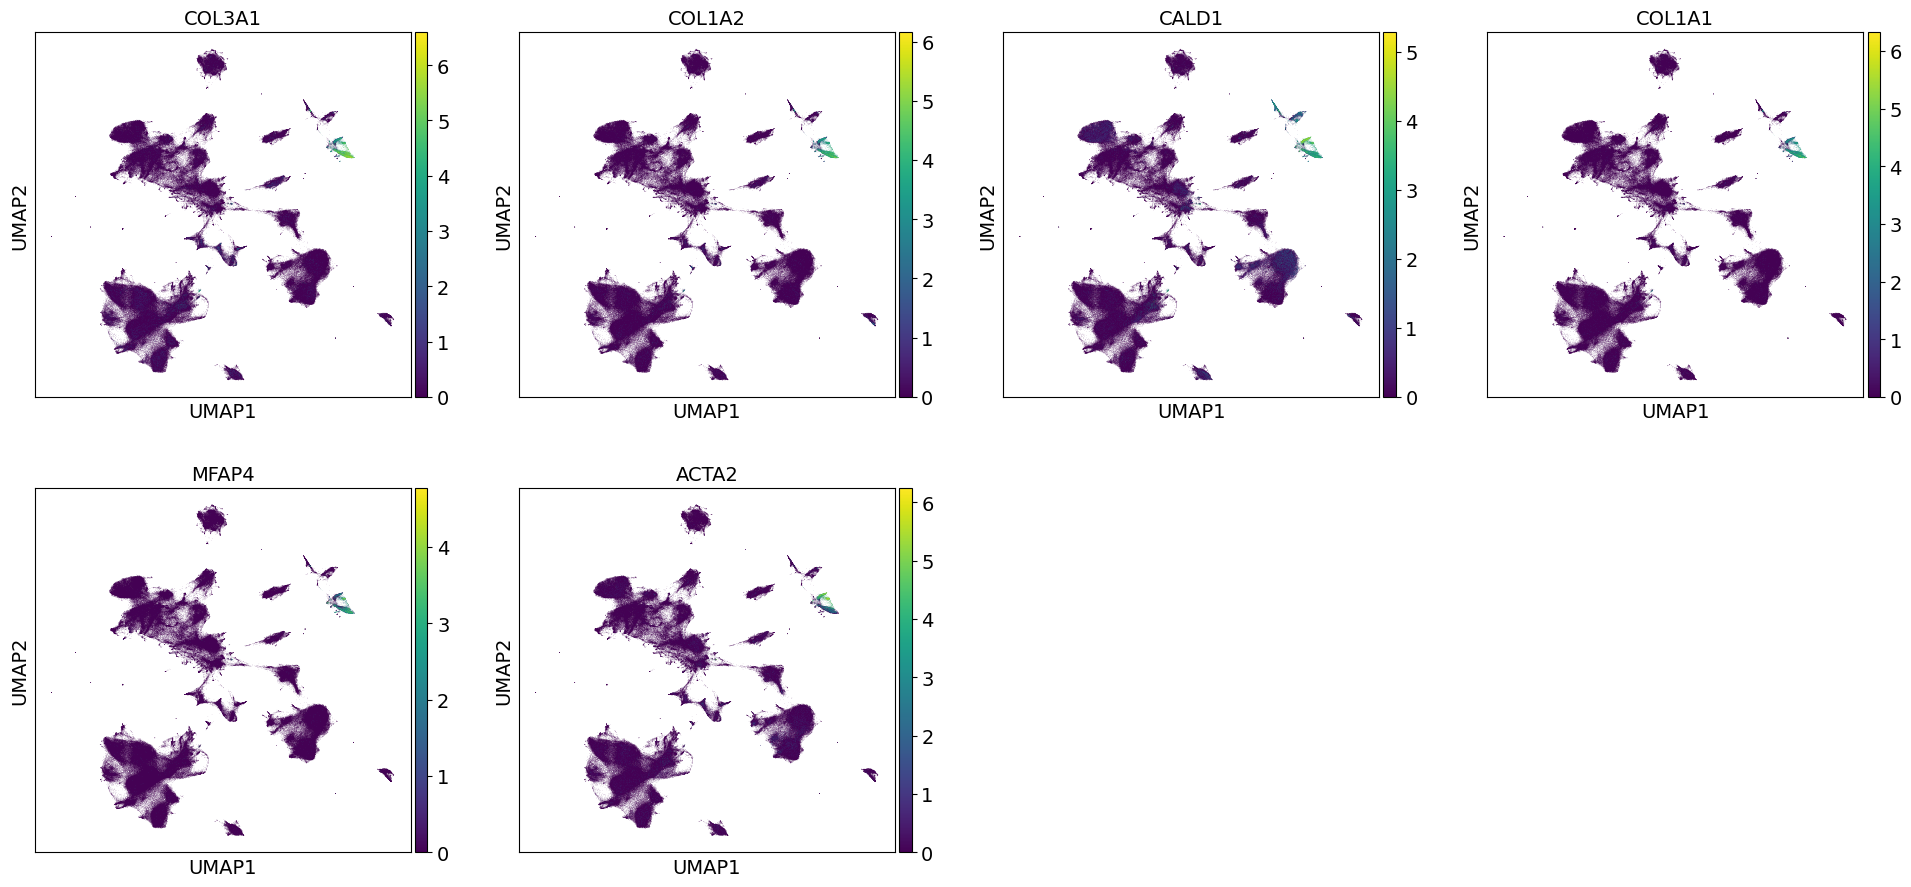

In [13]:
sc.pl.umap(adata,color=['COL3A1','COL1A2','CALD1','COL1A1', 'MFAP4','ACTA2'])

Neuron lineage

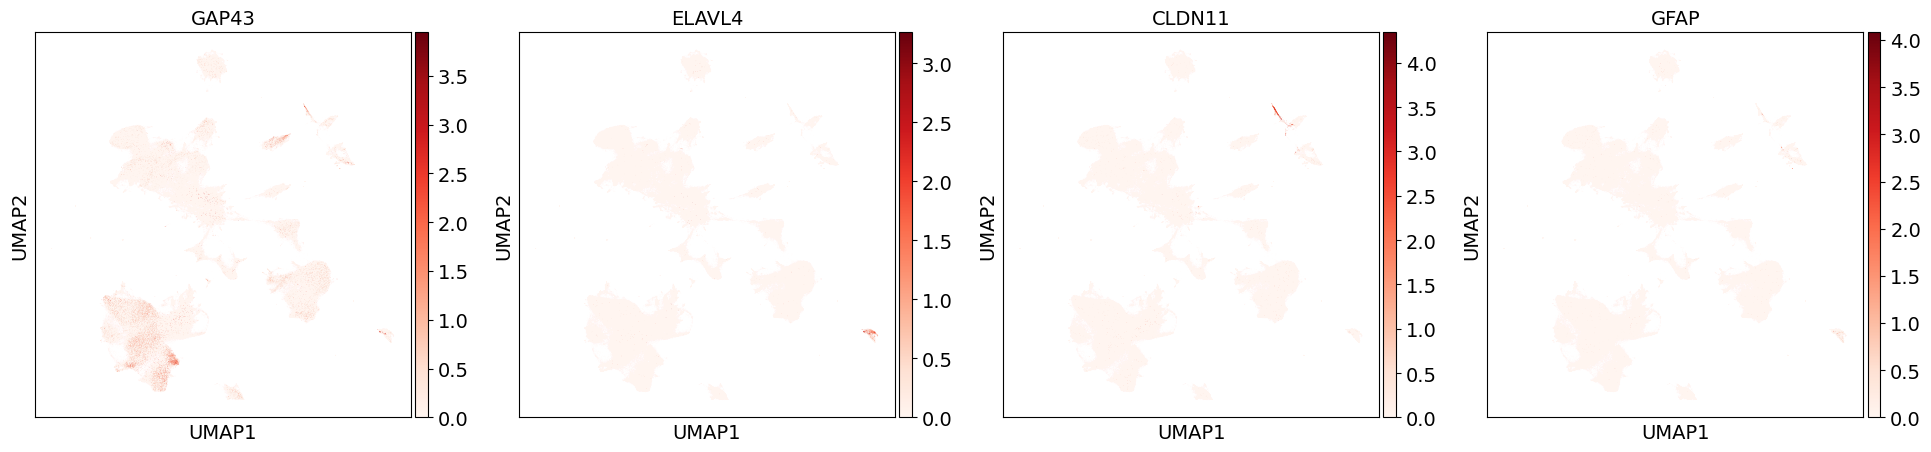

In [17]:
sc.pl.umap(adata,color=['GAP43','ELAVL4','CLDN11','GFAP'],color_map='Reds')

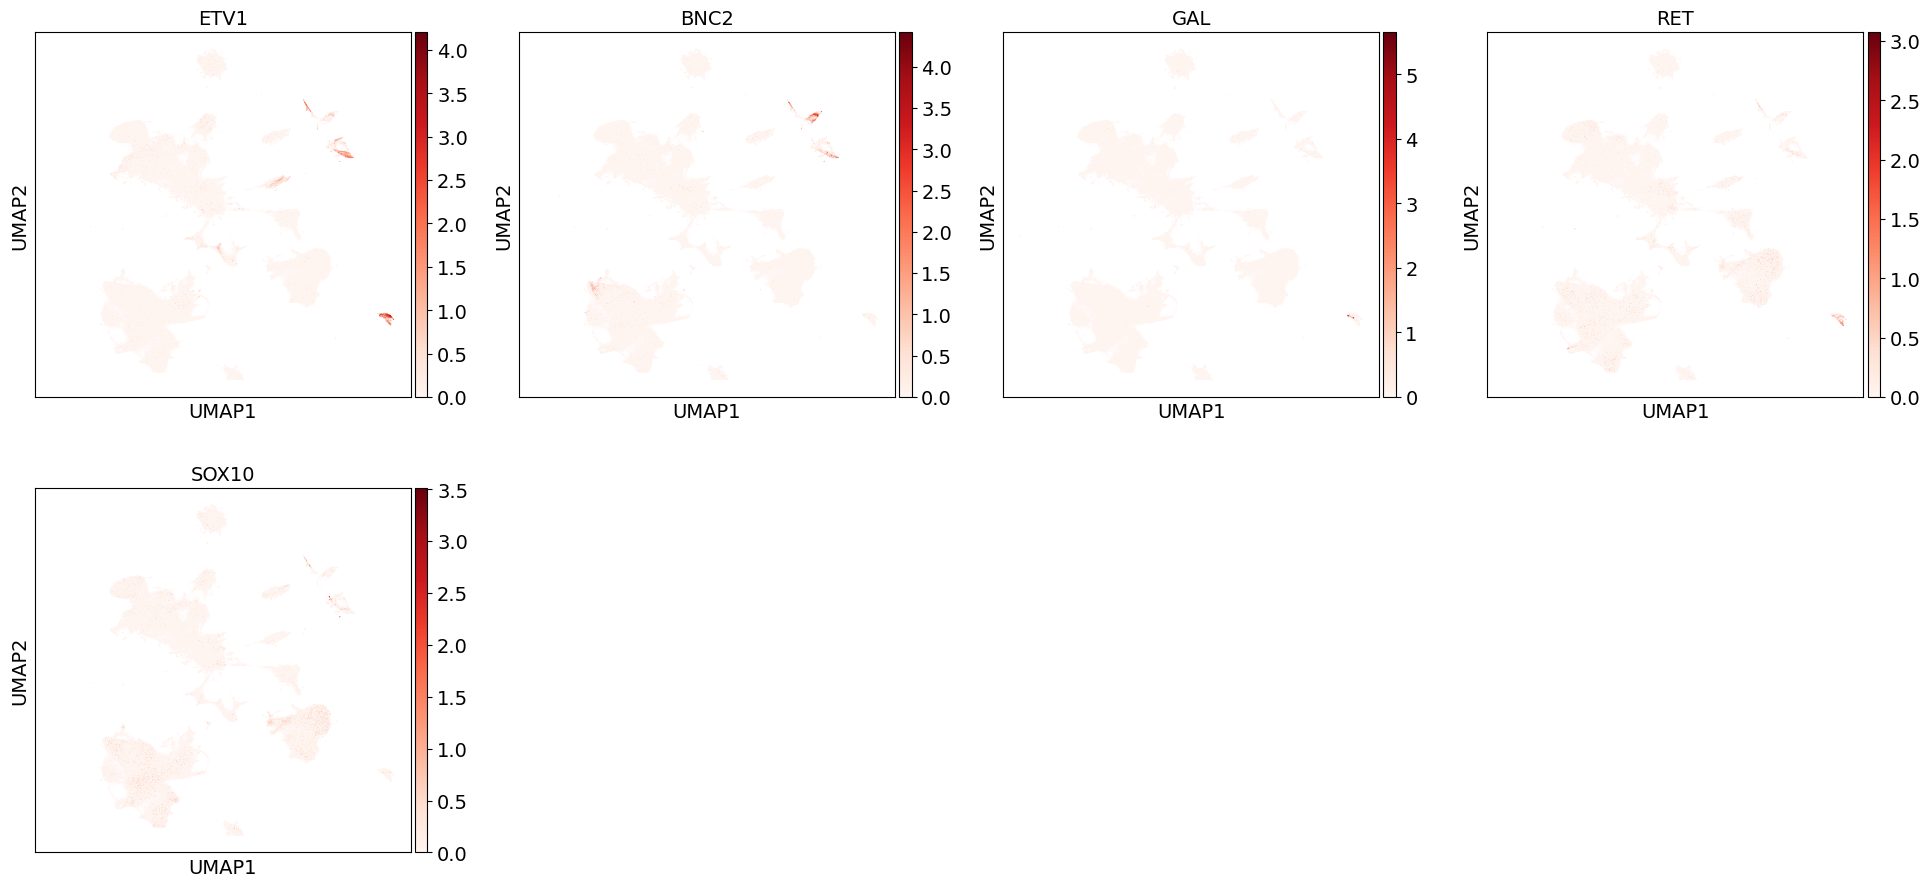

In [16]:
sc.pl.umap(adata,color=['ETV1','BNC2','GAL','RET','SOX10'],color_map='Reds')